# Carga de librerías

En primer lugar cargamos las librerías necesarias para los análisis. Las librerías son NumPy, Pandas, SciPy, Matplotlib y Seaborn. De las tres primeras librerías hablamos en los primeros cuadernos de la serie. La última librería (Seaborn) proporcionar algunas funciones adicionales bastante útiles para trabajar con gráficos estadísticos.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gamma, genextreme, gumbel_r
from matplotlib import pyplot as plt
import seaborn as sns

# Análisis de la importancia de la recolección de información

Vamos a mostrar con un ejemplo sencillo por qué es importante recolectar información climática. Concretamente, vamos a tomar cuatro muestras de datos de una misma distribución (gamma en el ejemplo), pero cada muestra va a tener una cantidad de datos diferente (10, 30, 100 y 1000 valores respectivamente).

Después, vamos a ajustar una función gamma a cada muestra, y vamos a analizar cuán parecidas son la gamma original y la ajustada.

In [ ]:
# Esta pequeña instrucción se utiliza para que las llamadas
# al generador aleatorio comiencen en el mismo número y que
# todas las ejecuciones sean comparables
np.random.seed(seed=233426)

a = 5
sc = 3
x1 = gamma(a, loc=0, scale=sc).rvs(size=10)
x2 = gamma(a, loc=0, scale=sc).rvs(size=30)
x3 = gamma(a, loc=0, scale=sc).rvs(size=100)
x4 = gamma(a, loc=0, scale=sc).rvs(size=1000)
f1 = gamma(*gamma.fit(x1))
f2 = gamma(*gamma.fit(x2))
f3 = gamma(*gamma.fit(x3))
f4 = gamma(*gamma.fit(x4))

xx = np.linspace(0, 100, 1001)
yy = gamma(a, loc=0, scale=sc).pdf(xx)
y1 = f1.pdf(xx)
y2 = f2.pdf(xx)
y3 = f3.pdf(xx)
y4 = f4.pdf(xx)
y = np.vstack([y1, y2, y3, y4])

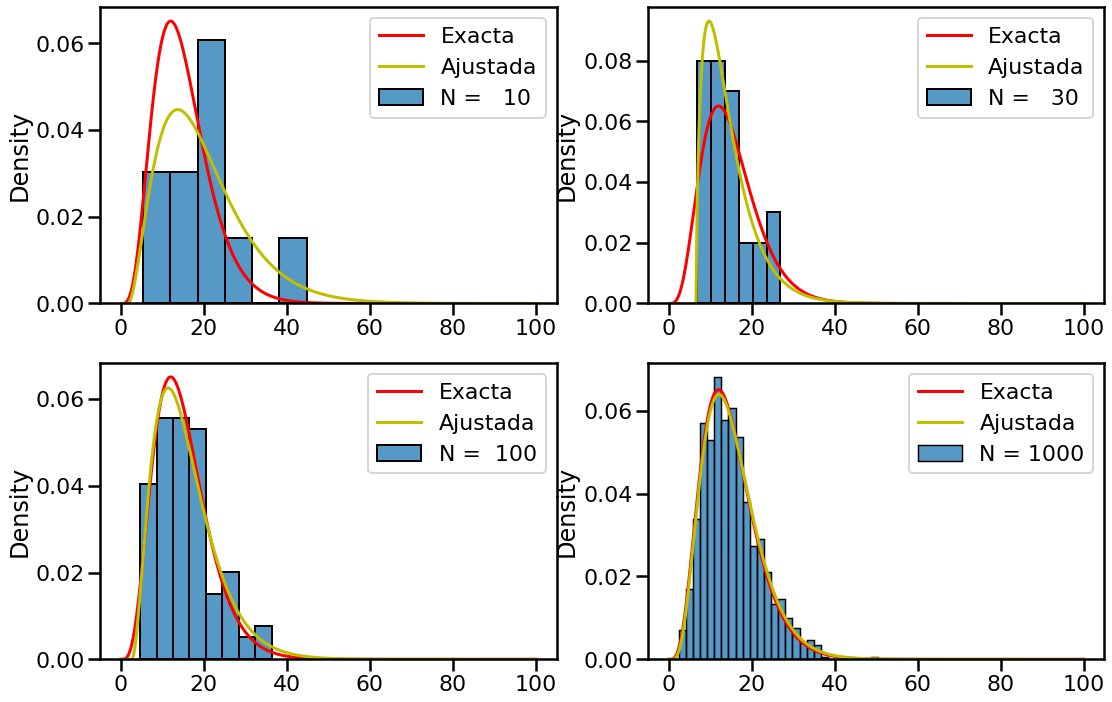

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))

sns.set_context("poster")

sns.histplot(x1, stat="density", ax=ax[0, 0], label="N =   10")
sns.histplot(x2, stat="density", ax=ax[0, 1], label="N =   30")
sns.histplot(x3, stat="density", ax=ax[1, 0], label="N =  100")
sns.histplot(x4, stat="density", ax=ax[1, 1], label="N = 1000")

for idx in range(4):
  i = idx // 2
  j = idx % 2
  ax[i, j].plot(xx,yy,"r", label="Exacta")
  ax[i, j].plot(xx,y[idx, :], "y", label="Ajustada")
  ax[i, j].legend()


Como puede verse en la figura superior, a medida que recolectamos muestra cada vez más numerosas, la distribución ajustada va convergiendo a la distribución exacta. En situaciones normales no tenemos acceso a la distribución exacta -entre otros motivos porque no existe tal distribución- y por ello es imprescindible utilizar la mayor cantidad de información que sea posible

# Ajuste de régimen medio

## Escala diaria

Vamos a utilizar el fichero hinflw_hist.csv para el análisis. Puede descargarse desde [aquí](https://drive.google.com/file/d/1SEDLLAHpUWLZK1a-aj9NbiZ1emv5zoaP/view?usp=sharing). El fichero contiene 30 años de datos de caudales.

Para cargar la información, utilizamos la librería Pandas y su función read_csv.

In [ ]:
datos = pd.read_csv("hinflw_hist.csv", parse_dates=True, index_col="fecha")

Pintamos directamente la serie temporal

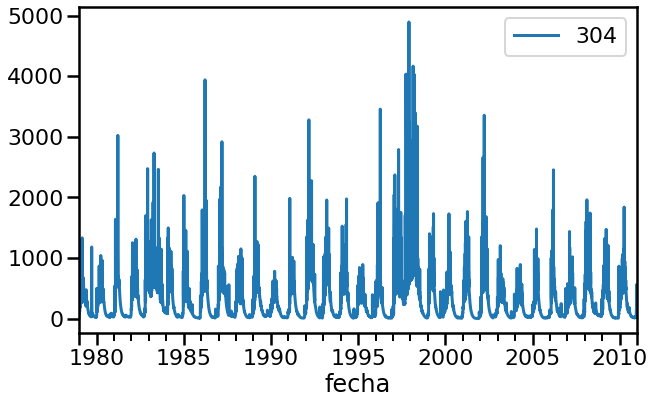

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
datos.plot(ax=ax)

Y podemos caracterizar su régimen medio sin más que construir la función de densidad o la de distribución, considerando todos los datos sin eliminar ninguno.

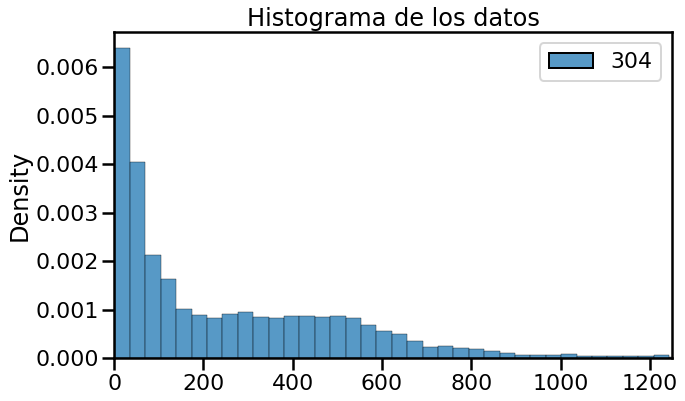

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(datos, stat="density")
ax.set_xlim([0, 1250])
ax.set_title("Histograma de los datos");

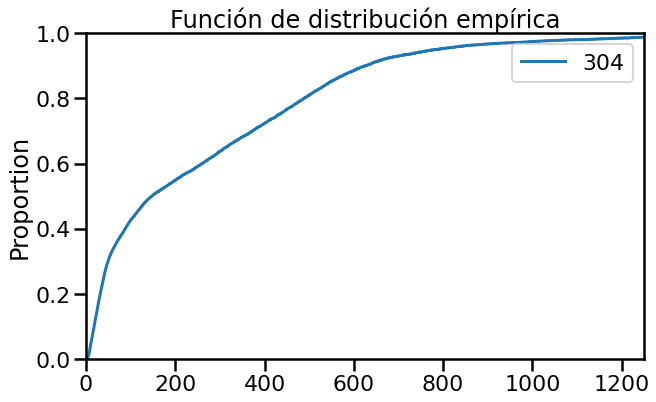

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.ecdfplot(datos)
ax.set_xlim([0, 1250])
ax.set_title("Función de distribución empírica");

Y también podemos calcular algunos de los estadísticos de los datos, como su media, su error estándar, su mínimo y máximo, y alguno de sus cuantiles.

In [ ]:
datos.describe()

,304
count,11688.000000
mean,269.312912
std,318.301412
min,0.681800
25%,39.730275
50%,147.497100
75%,431.998750
max,4900.051800


## Escala mensual

De hecho, podemos cambiar su resolución de diaria a mensual para un análisis agregado

In [ ]:
mensuales = datos.resample("M").mean()

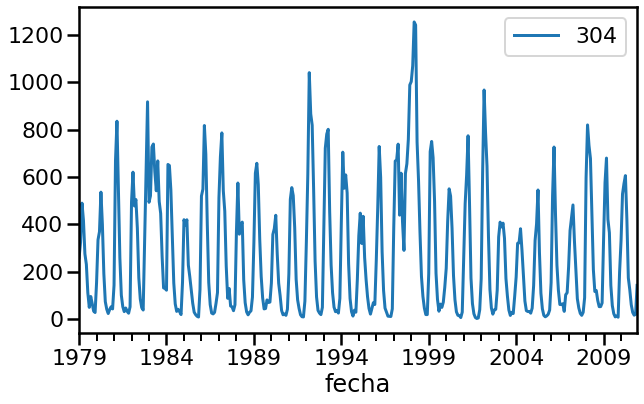

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
mensuales.plot(ax=ax)

Y realizar el análisis estadístico anterior.

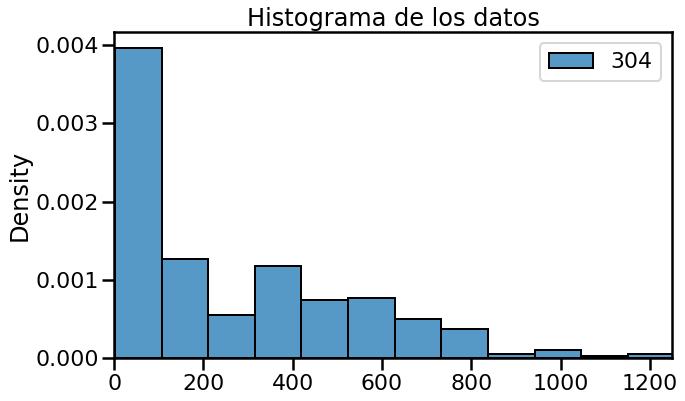

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(mensuales, stat="density")
ax.set_xlim([0, 1250])
ax.set_title("Histograma de los datos");

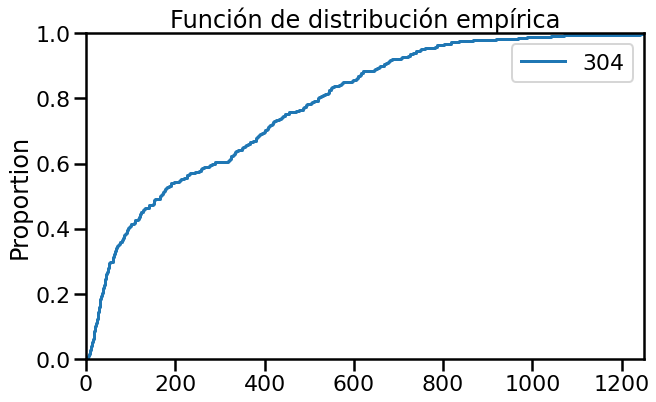

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.ecdfplot(mensuales)
ax.set_xlim([0, 1250])
ax.set_title("Función de distribución empírica");

In [ ]:
mensuales.describe()

,304
count,384.000000
mean,271.062048
std,263.970073
min,1.502271
25%,45.118881
50%,166.934564
75%,446.207655
max,1255.157403


## Escala anual

E incluso realizar el análisis a escala anual

In [ ]:
anual = datos.resample("A").mean()

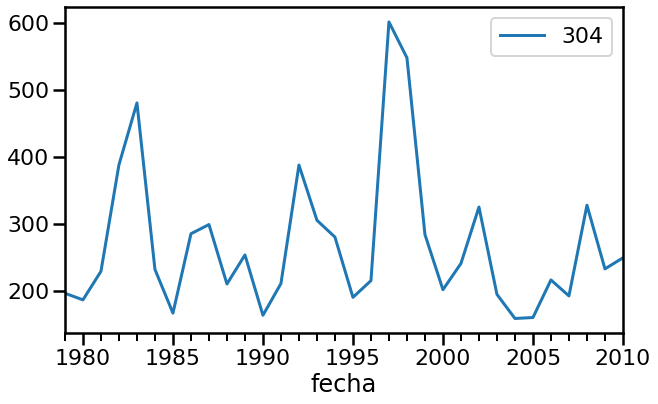

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
anual.plot(ax=ax)

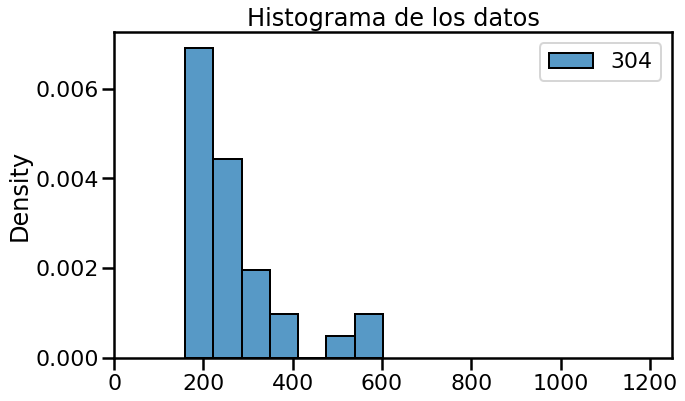

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(anual, stat="density")
ax.set_xlim([0, 1250])
ax.set_title("Histograma de los datos");

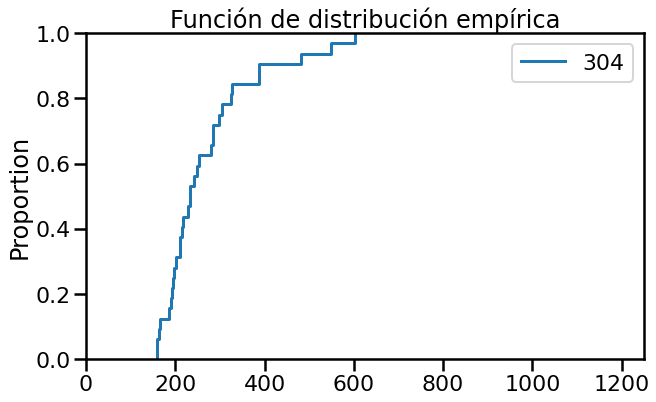

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.ecdfplot(anual)
ax.set_xlim([0, 1250])
ax.set_title("Función de distribución empírica");

In [ ]:
anual.describe()

,304
count,32.000000
mean,269.332915
std,109.217272
min,158.726844
25%,196.019733
50%,232.452760
75%,300.734870
max,602.004298


# Ajuste de régimen extremal

Para el ajuste extremal, como dijimos en el vídeo de teoría, tenemos que tomar los máximos valores anuales y ajustar una distribución de extremos.

In [ ]:
maximos = datos.resample("A").max()

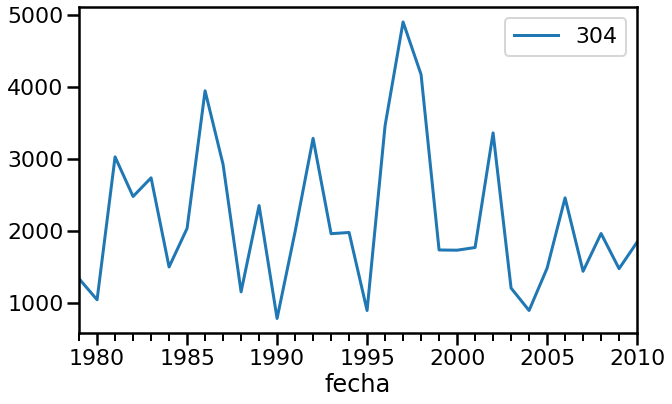

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
maximos.plot(ax=ax)

y podríamos ajustar directamente una distribución de Gumbel, que es más sencilla de ajustar que una GEV por tener únicamente 2 parámetros.

In [ ]:
dist = gumbel_r
params = dist.fit(maximos.values)

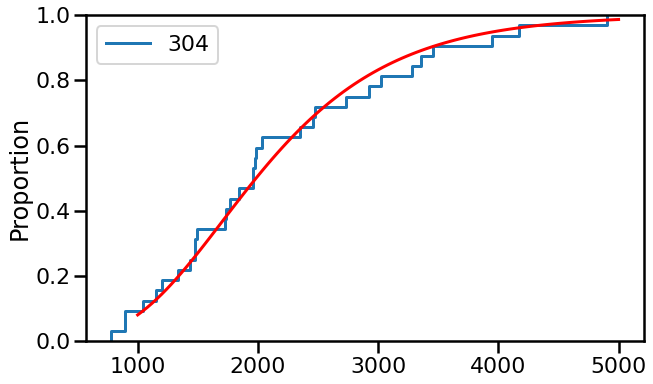

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.ecdfplot(maximos)
v = np.linspace(1000, 5000, 101)
p = dist(*params).cdf(v)
ax.plot(v, p, "r")

O una generalizada de extremos, que tiene tres parámetros, y que puede ser más complicada de ajustar porque tiene 3 parámetros, uno de ellos de forma, lo que la hace más sensible a posibles _outliers_.

In [ ]:
dist = genextreme
params = dist.fit(maximos.values, f0=-.15)

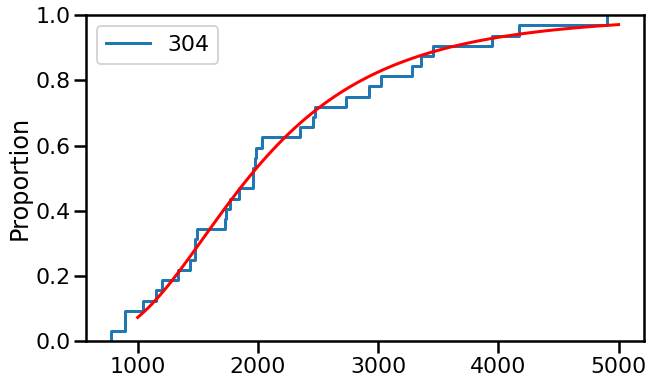

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.ecdfplot(maximos)
v = np.linspace(1000, 5000, 101)
p = dist(*params).cdf(v)
ax.plot(v, p, "r")

---
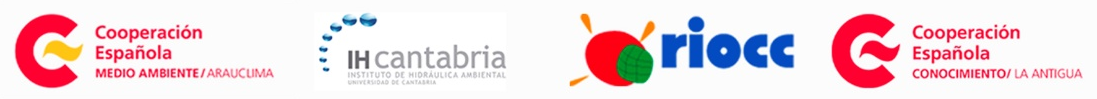

**Este cuaderno de Jupyter ha sido desarrollado por Salvador Navas y Manuel del Jesus.**